## Introduction

### Import Python Modules

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='once')

### Load Data

In [2]:
# Load data
profiles = pd.read_csv('profiles.csv')
display(profiles.head())

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at:<br />\nhttp://bag...   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

                          location  \
0  south san francisco, california   
1              oakland, california   
2        san francisco, california   
3             berkeley, california   
4        san francisco, california   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   
1  doesn&rsquo;t have kids, but might want them    straight   
2                                           NaN    straight   
3                       doesn&rsquo;t want kids    straight   
4                                           NaN    straight   

                        pets                                  religion sex  \
0  likes dogs and likes cats     agnosticism and very serious about it   m   
1  likes dogs and likes cats  agnosticism but not too serious about it   m   
2                   has cats                                       NaN   m   
3                 likes cats                                       NaN   m   
4  likes dogs and likes cats                                       NaN   m   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks     status  
0                                            english     single  
1  english (fluently), spanish (poorly), french (...     single  
2                               english, french, c++  available  
3                           english, german (poorly)     single  
4                                            english     single  

[5 rows x 31 columns]

## Exploratory Data Analysis

### Initial preview

In [3]:
# Check total number of entries and column types
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

### Check for missing values

Null values are present in the dataset, let's check the count for each column. Highest count of null values is seen in `offspring` column with `35561` missing values. It would not be ideal to drop rows based on this screen since over half of our dataset would be eliminated. The best step forward would be to set a replacement for each `NaN` value accordingly.

In [4]:
# Check null value count
print(profiles.isna().sum())

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64


### Continuous Variables

**Age**

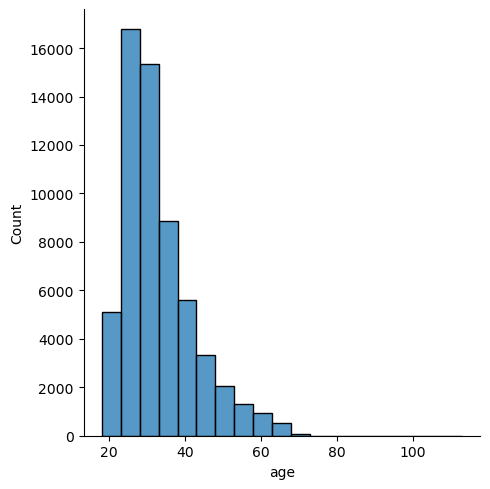

In [5]:
sns.displot(data=profiles, x='age', kind='hist', binwidth=5)

**Height**

C:\Users\abelk\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


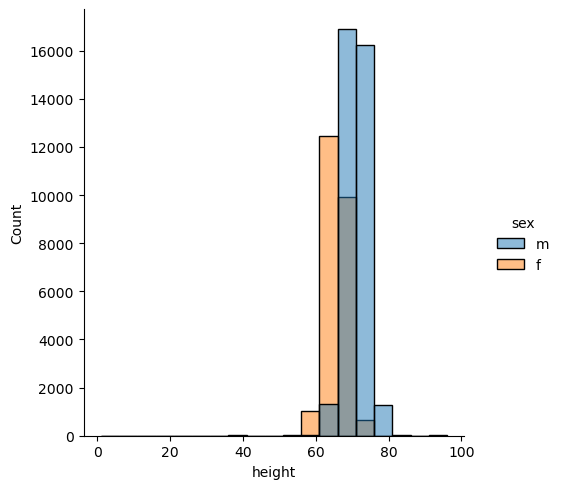

In [6]:
sns.displot(data=profiles, x='height', hue='sex', kind='hist', binwidth=5)

**Income**

C:\Users\abelk\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


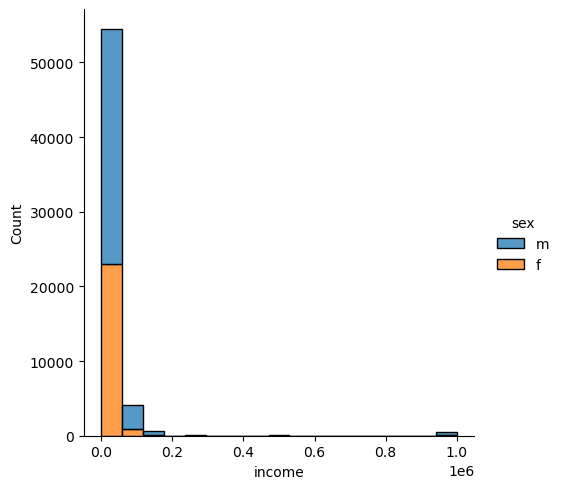

In [7]:
g = sns.displot(data=profiles, x='income', hue='sex', multiple='stack')

### Discrete Variables

**Sex**

<AxesSubplot:xlabel='count', ylabel='sex'>

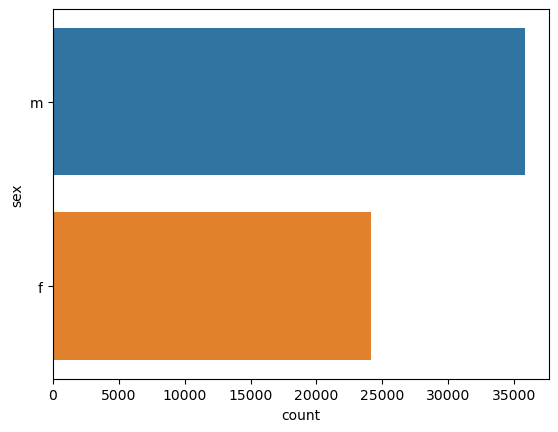

In [8]:
sns.countplot(data=profiles, y='sex', order=profiles['sex'].value_counts().index)

**Orientation**

<AxesSubplot:xlabel='count', ylabel='orientation'>

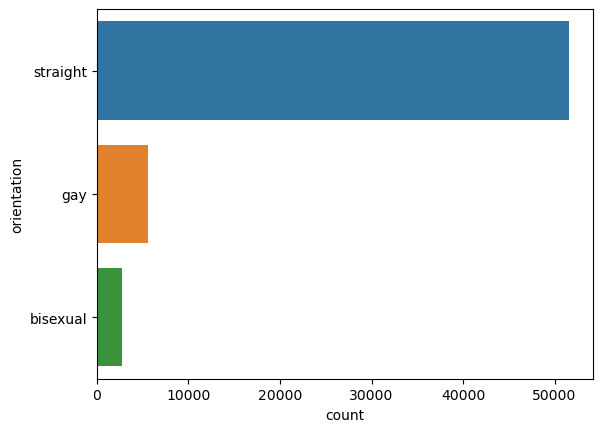

In [9]:
sns.countplot(data=profiles, y='orientation', order=profiles['orientation'].value_counts().index)

**Body Type**

<AxesSubplot:xlabel='count', ylabel='body_type'>

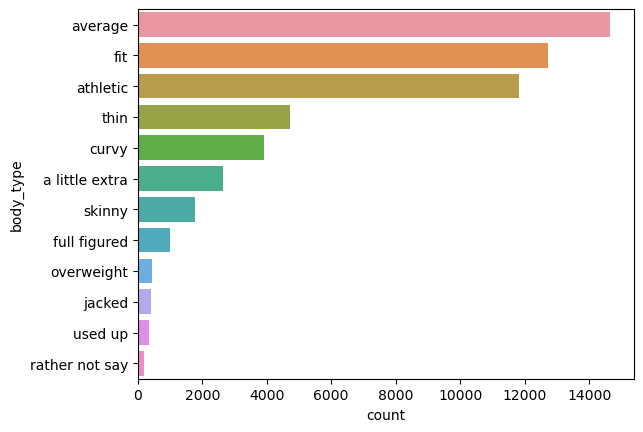

In [10]:
sns.countplot(data=profiles, y='body_type', order=profiles['body_type'].value_counts().index)

**Drinks**

<AxesSubplot:xlabel='count', ylabel='drinks'>

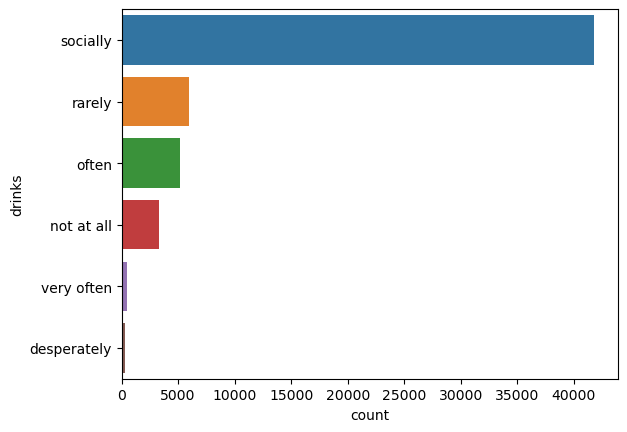

In [11]:
sns.countplot(data=profiles, y='drinks', order=profiles['drinks'].value_counts().index)

**Drugs**

<AxesSubplot:xlabel='count', ylabel='drugs'>

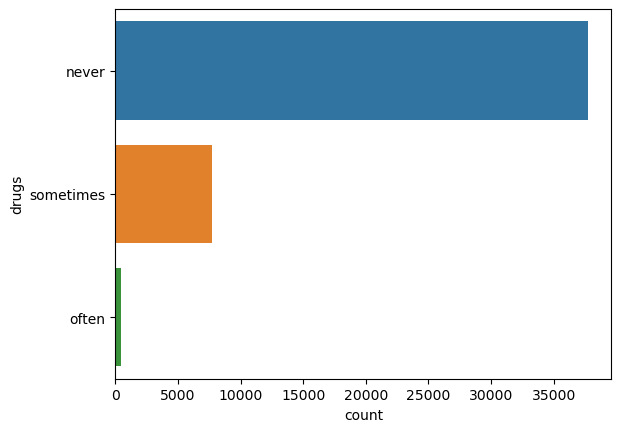

In [12]:
sns.countplot(data=profiles, y='drugs', order=profiles['drugs'].value_counts().index)

**Education**

<AxesSubplot:xlabel='count', ylabel='education'>

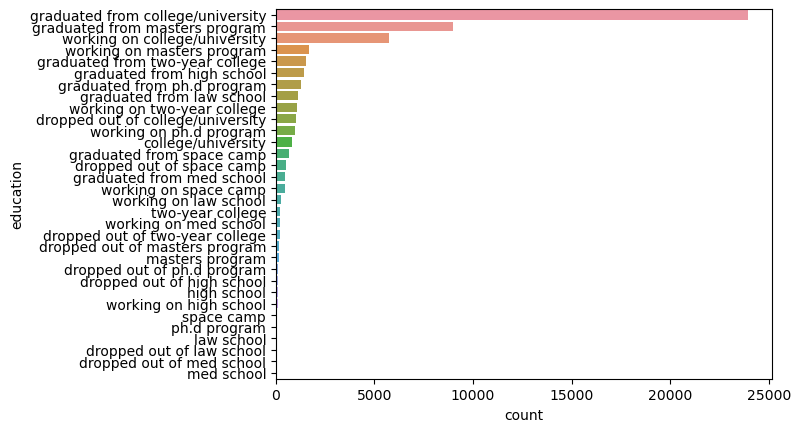

In [13]:
sns.countplot(data=profiles, y='education', order=profiles['education'].value_counts().index)

**Job**

<AxesSubplot:xlabel='count', ylabel='job'>

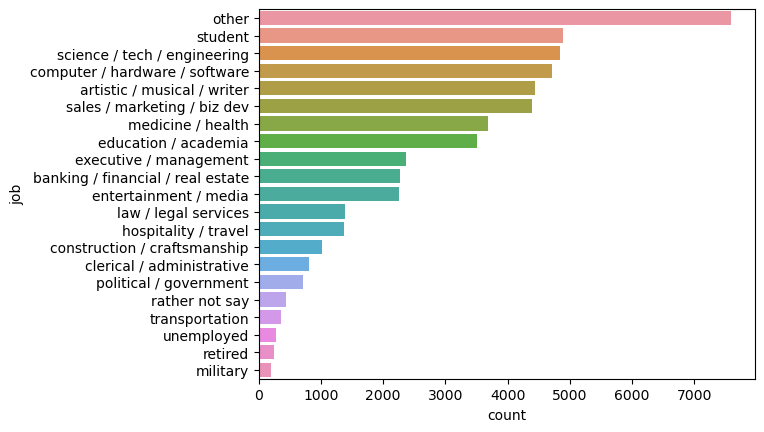

In [14]:
sns.countplot(data=profiles, y='job', order=profiles['job'].value_counts().index)

**Offspring**

<AxesSubplot:xlabel='count', ylabel='offspring'>

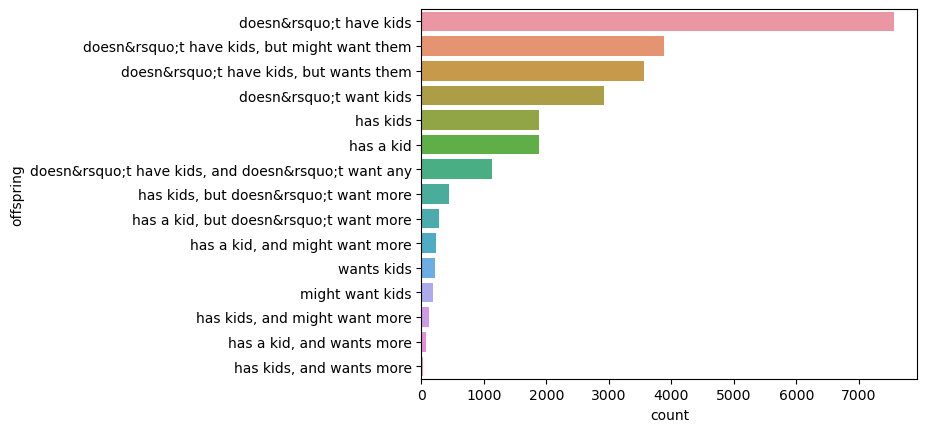

In [15]:
sns.countplot(data=profiles, y='offspring', order=profiles['offspring'].value_counts().index)

**Pets**

<AxesSubplot:xlabel='count', ylabel='pets'>

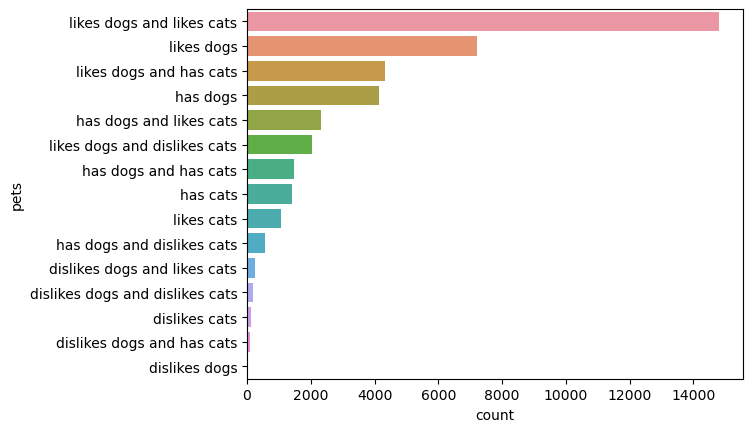

In [16]:
sns.countplot(data=profiles, y='pets', order=profiles['pets'].value_counts().index)

**Religion**

<AxesSubplot:xlabel='count', ylabel='religion_cleaned'>

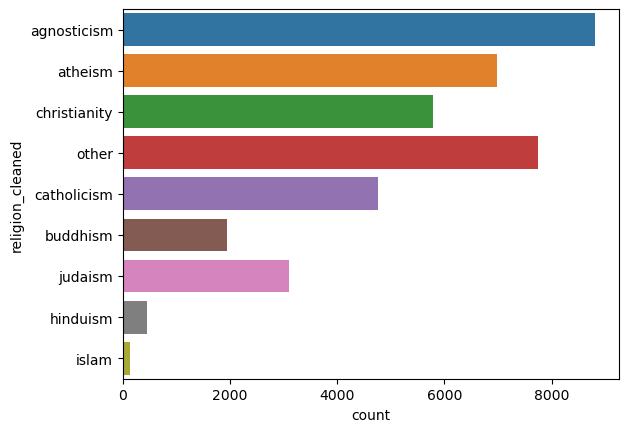

In [17]:
# Clean religions column
profiles['religion_cleaned'] = profiles['religion'].str.split().str[0]
sns.countplot(data=profiles, y='religion_cleaned')

**Sign**

<AxesSubplot:xlabel='count', ylabel='sign_cleaned'>

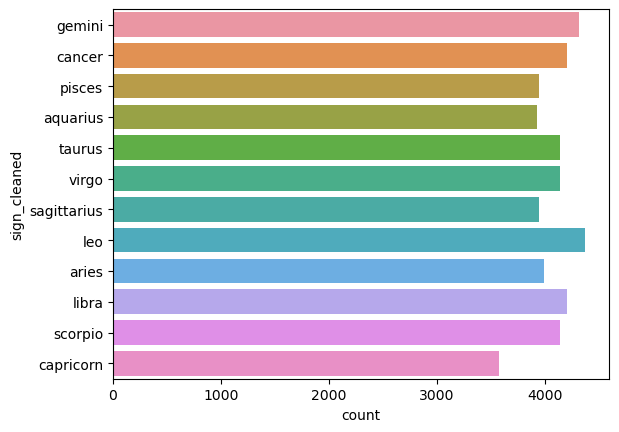

In [18]:
# Clean signs column
profiles['sign_cleaned'] = profiles['sign'].str.split().str[0]
sns.countplot(data=profiles, y='sign_cleaned')

**Smokes**

<AxesSubplot:xlabel='count', ylabel='smokes'>

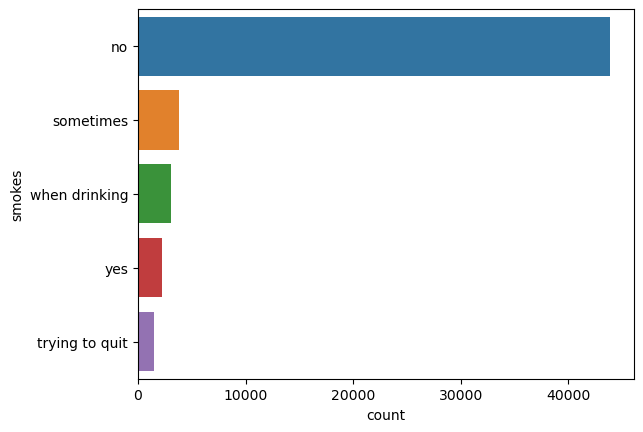

In [19]:
sns.countplot(data=profiles, y='smokes', order=profiles['smokes'].value_counts().index)

**Diet**

<AxesSubplot:xlabel='count', ylabel='diet'>

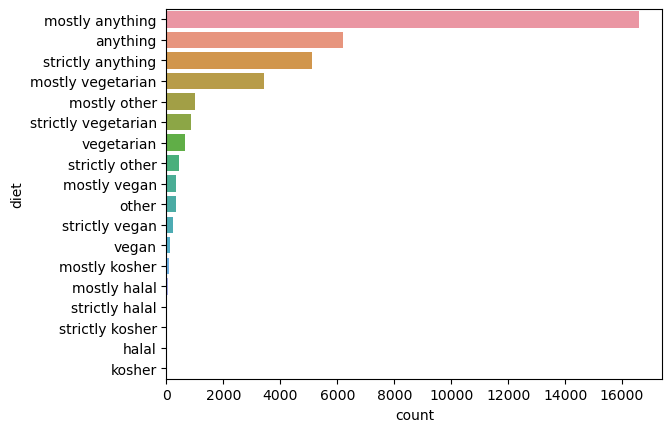

In [20]:
sns.countplot(data=profiles, y='diet', order=profiles['diet'].value_counts().index)

## Data Preparation

### Handle missing values

<AxesSubplot:xlabel='count', ylabel='vegetarian'>

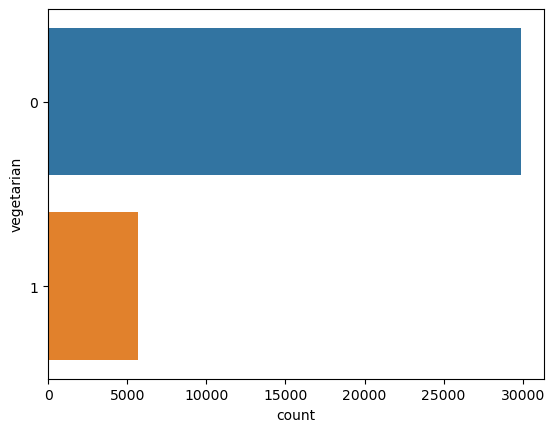

In [21]:
# Handle missing values
profiles = profiles[profiles['diet'].notnull()]
profiles['vegetarian'] = profiles['diet'].isin(['vegetarian', 'vegan', 'mostly vegetarian',
                                                    'strictly vegan', 'strictly vegetarian', 'mostly vegan'])
profiles['vegetarian'] = profiles['vegetarian'].astype(int)
sns.countplot(data=profiles, y='vegetarian')

From observation, there is an uneven distribution in the target class, i.e. there is roughly six times more non-vegetarians than vegetarians. There are several methods to address this issue, but for this purpose, we will use the resampling method found in `sklearn`'s library. 

Two methods of resampling can be used: 

(a) **oversampling** (in which the minority class is oversampled with replacement)

(b) **undersampling** (in which rows are randomly deleted from the majority class)

We will be using the oversampling method after the data has been split into training and testing data.

### Features of Interest

In [22]:
features = ['sex', 'body_type', 'drinks', 'drugs', 'education', 'job', 'religion_cleaned', 'sign_cleaned', 'vegetarian']
display(profiles[features].head(5))

sex       body_type    drinks      drugs                          education  \
0   m  a little extra  socially      never      working on college/university   
1   m         average     often  sometimes              working on space camp   
2   m            thin  socially        NaN     graduated from masters program   
3   m            thin  socially        NaN      working on college/university   
5   m         average  socially        NaN  graduated from college/university   

                              job religion_cleaned sign_cleaned  vegetarian  
0                  transportation      agnosticism       gemini           0  
1            hospitality / travel      agnosticism       cancer           0  
2                             NaN              NaN       pisces           0  
3                         student              NaN       pisces           1  
5  computer / hardware / software          atheism       taurus           0

### Dummy Variables

In [23]:
X = pd.get_dummies(profiles[features].iloc[:,:-1])
print(X.head(3))

   sex_f  sex_m  body_type_a little extra  body_type_athletic  \
0      0      1                         1                   0   
1      0      1                         0                   0   
2      0      1                         0                   0   

   body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
0                  0                0              0                       0   
1                  1                0              0                       0   
2                  0                0              0                       0   

   body_type_jacked  body_type_overweight  ...  sign_cleaned_cancer  \
0                 0                     0  ...                    0   
1                 0                     0  ...                    1   
2                 0                     0  ...                    0   

   sign_cleaned_capricorn  sign_cleaned_gemini  sign_cleaned_leo  \
0                       0                    1                 0 

### Target Variable

In [24]:
y = profiles.iloc[:, -1]
print(y.head(5))

0    0
1    0
2    0
3    1
5    0
Name: vegetarian, dtype: int32


## Model Building

### Training/Testing Sets

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Oversampling

In [26]:
# Imbalanced dataset
print(y_train.value_counts())

0    23863
1     4577
Name: vegetarian, dtype: int64


In [27]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(y_train_over.value_counts())

0    23863
1    23863
Name: vegetarian, dtype: int64


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(multi_class = 'multinomial', max_iter=1000)
regressor.fit(X_train_over, y_train_over)

LogisticRegression(max_iter=1000, multi_class='multinomial')

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_over, y_train_over)

KNeighborsClassifier()

## Model Evaluation

### Logistic Regression

In [31]:
# Predict test set
lr_pred = regressor.predict(X_test)

# Predict probabilities
lr_probs= regressor.predict_proba(X_test)

# Keep probabilities for positive outcome only
lr_probs = lr_probs[:, 1]

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.75      6000
           1       0.25      0.63      0.36      1111

    accuracy                           0.65      7111
   macro avg       0.58      0.64      0.56      7111
weighted avg       0.80      0.65      0.69      7111



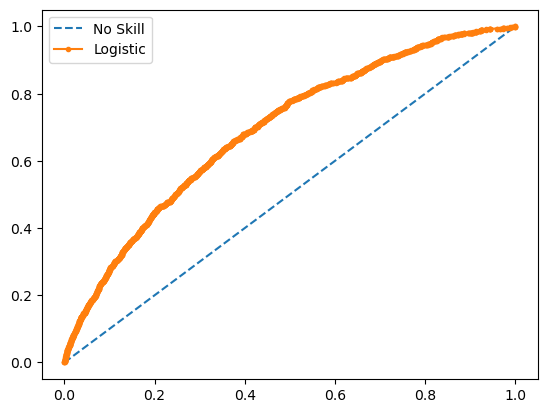

In [33]:
# Calculate roc curves
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# Plot roc curves
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.legend()

### Decision Tree

In [34]:
# Predict test set
y_pred_dt = dt.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      6000
           1       0.20      0.25      0.22      1111

    accuracy                           0.72      7111
   macro avg       0.53      0.53      0.53      7111
weighted avg       0.75      0.72      0.74      7111



In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
cm_labels = dt.classes_

Text(0.5, 1.0, 'Confusion Matrix')

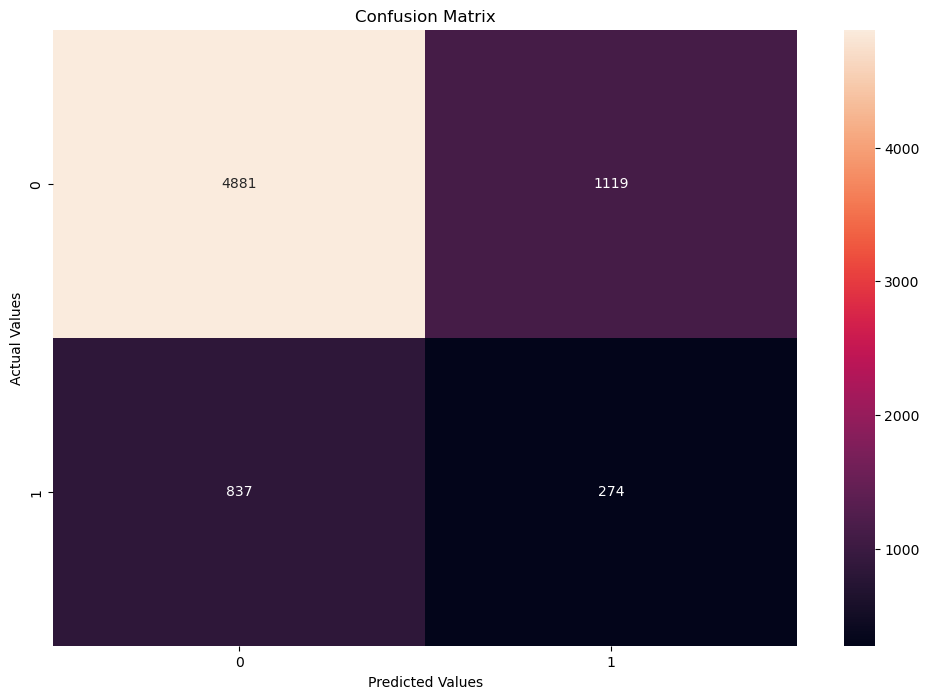

In [37]:
plt.figure(figsize=(12,8))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')

### K-Nearest Neighbors

In [38]:
# Predict values
knn_pred = classifier.predict(X_test)

C:\Users\abelk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      6000
           1       0.21      0.50      0.29      1111

    accuracy                           0.62      7111
   macro avg       0.54      0.57      0.52      7111
weighted avg       0.77      0.62      0.67      7111



## Hyperparameter Tuning

### Logistic Regression

In [40]:
# Make an array of C's (0.001 - 100)
C_array= np.logspace(-3,2, 100)
tuning_C = {'C': C_array}

# Input to param_grid parameter
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
gs = GridSearchCV(clf, param_grid = tuning_C, scoring='accuracy', cv=5)
gs.fit(X_train, y_train)
print(gs.cv_results_)

{'mean_fit_time': array([0.05427198, 0.05647459, 0.05467048, 0.06590796, 0.06294589,
       0.06174536, 0.06414537, 0.05885415, 0.06235971, 0.06463757,
       0.06294637, 0.05985532, 0.05795226, 0.05917315, 0.05796432,
       0.06346431, 0.06283622, 0.06334352, 0.06434579, 0.06618166,
       0.06473689, 0.0663343 , 0.06713619, 0.0670382 , 0.06843443,
       0.07172513, 0.0712369 , 0.0744422 , 0.08149314, 0.08380117,
       0.08162065, 0.09178591, 0.09725466, 0.09098392, 0.1015543 ,
       0.11168313, 0.11631327, 0.11881385, 0.13147445, 0.13141551,
       0.12199955, 0.14994559, 0.15622001, 0.15362315, 0.15312462,
       0.16103687, 0.1512217 , 0.17625017, 0.17392263, 0.16830797,
       0.16713729, 0.17032514, 0.15134354, 0.17040539, 0.14897919,
       0.19169288, 0.19983048, 0.21203132, 0.23936577, 0.24686747,
       0.20064459, 0.17962832, 0.27008214, 0.29470825, 0.23981762,
       0.25702677, 0.22410736, 0.14961219, 0.13240848, 0.13449106,
       0.12929254, 0.13030596, 0.13128252, 0

In [41]:
# Best parameters
print(gs.best_estimator_)
print(gs.best_score_)

best_C = gs.best_params_['C']

LogisticRegression(C=0.07390722033525779, penalty='l1', random_state=0,
                   solver='liblinear')
0.8395218002812939


### Decision Tree

In [43]:
# Choosing best max depth value
accuracy = []
depths = range(1,25)

for depth in depths:
    dt_tune = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt_tune.fit(X_train_over, y_train_over)
    accuracy.append(dt_tune.score(X_test, y_test))
    
print(accuracy)

[0.616650260160315, 0.6563071297989032, 0.6828856700885951, 0.6678385599774996, 0.6664322880045, 0.6426662916608072, 0.63338489663901, 0.6371818309661088, 0.6377443397553086, 0.6138377162143158, 0.6153846153846154, 0.6149627337927155, 0.6257910279848122, 0.6241035016172127, 0.6245253832091127, 0.6294473351146112, 0.6556039938124033, 0.6253691463929124, 0.6181971593306146, 0.6291660807200112, 0.6315567430741106, 0.6370412037688089, 0.6395724933202082, 0.6460413443960061]


Text(0.5, 1.0, 'Choosing Best Max Depth')

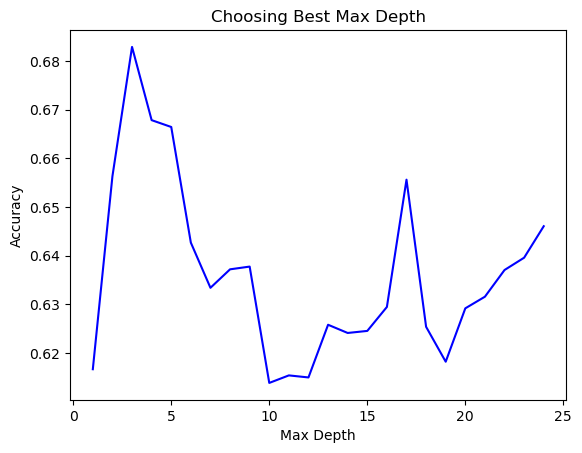

In [44]:
# Plot accuracy against max depth
plt.plot(depths, accuracy, color='blue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Choosing Best Max Depth')

In [45]:
# Best max depth value
best_max_depth = np.argmax(accuracy) + 1
print("The best max depth value:", best_max_depth)
print("The accuracy score:", accuracy[best_max_depth])

The best max depth value: 3
The accuracy score: 0.6678385599774996


### K-Nearest Neighbors

In [46]:
# Choosing best k value
knn_accuracy = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_over, y_train_over)
    knn_accuracy.append(knn.score(X_test, y_test))

C:\Users\abelk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abelk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\abelk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abelk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

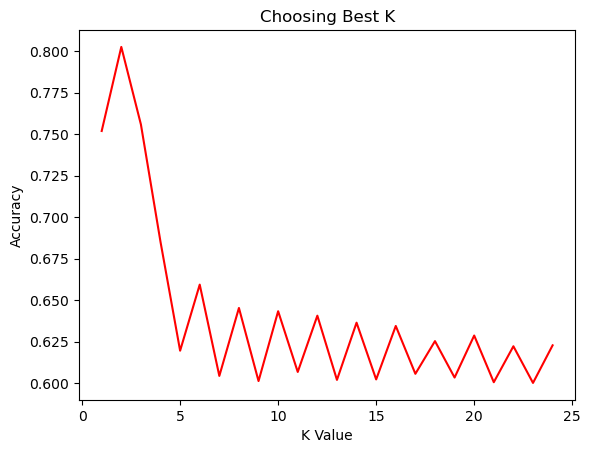

In [47]:
# Plot accuracy against k values
plt.plot(range(1,25), knn_accuracy, color='red')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Choosing Best K')
plt.show()

In [48]:
# Find K value with best accuracy score
best_k = np.argmax(knn_accuracy) + 1
print("The best k_value:", best_k)
print("The accuracy score:", knn_accuracy[best_k - 1])

The best k_value: 2
The accuracy score: 0.8025594149908593


## Final Model

The best model for predicting our target variable after model tuning was the `KNeighborClassifier` with an accuracy score of 80.3%. While there are several hyperparameters that could be tuned, for the sake of brevity, only the `K` value was tuned using a range of values between 1-25. The optimal `K` value was **2**.

In [49]:
# Tuned logistic regression model
final_model = KNeighborsClassifier(n_neighbors=2)
final_model.fit(X_train_over, y_train_over)

final_y_pred = final_model.predict(X_test)
print(classification_report(y_test, final_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6000
           1       0.24      0.12      0.16      1111

    accuracy                           0.80      7111
   macro avg       0.54      0.52      0.52      7111
weighted avg       0.76      0.80      0.77      7111



C:\Users\abelk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_final = confusion_matrix(y_test, final_y_pred)
cm_final_labels = final_model.classes_

Text(0.5, 1.0, 'Confusion Matrix')

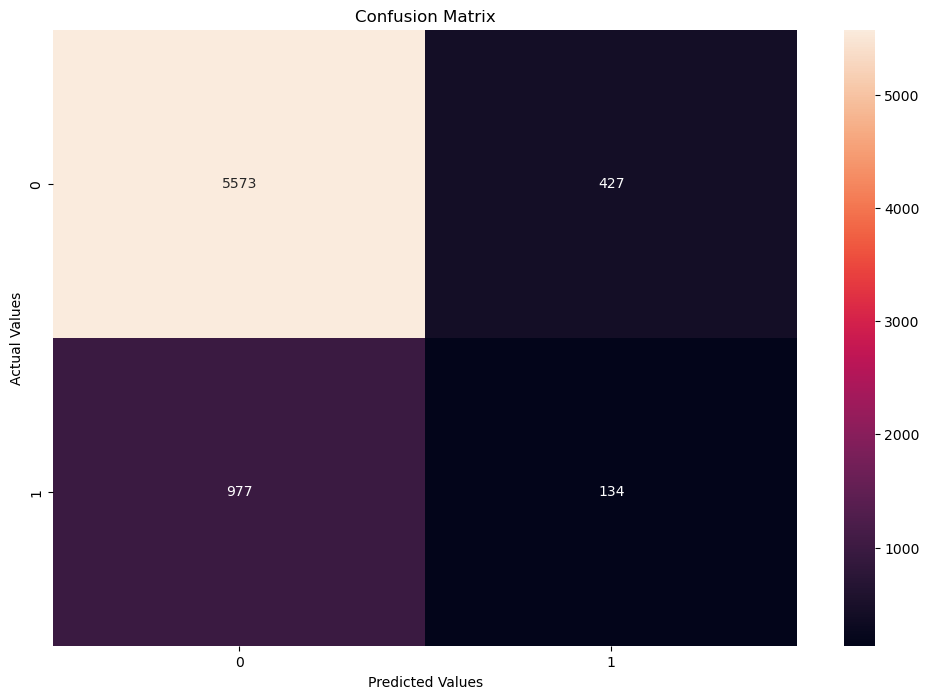

In [51]:
plt.figure(figsize=(12,8))

ax = plt.subplot()
sns.heatmap(cm_final, annot=True, ax=ax, fmt='d')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix');

## Summary

Combining feature engineering with machine learning methods, the model was able to predict whether an individual was vegetarian or not based on profile features. Most features were categorical, so conversion to numerical values were required for model input. Using three machine learning models, the following accuracy scores were achieved post hyperparameter tuning:
    
    - Logistic Regression: 83.9%
    - Decision Tree: 66.7%
    - K-Nearest Neighbors: 80.2%

As seen, logistic regression achieved the highest score with the following hyperparameters:

    - C = 0.07
    - penalty = 'L1'
    - solver = 'liblinear'
    
This indicates, on average, the model is able to accurately predict every 8 out of 10 individuals whether they are on a vegetarian diet. Binary classifications are useful in real world applications, and with the help of machine learning, we can understand important relationships between variables. 